In [1]:
%pylab inline
from mezo import *
import scipy.linalg as sl # we need a generailzed eigen solver

Populating the interactive namespace from numpy and matplotlib


In [26]:
# Generate some random onsite and hopping 
# to be used for translationally invariant 
# lead
dim=3
H0=matrix(randn(dim,dim)+randn(dim,dim)*1.0j);
H1=matrix(randn(dim,dim)+randn(dim,dim)*1.0j);
H0=(H0+H0.H); 

In [27]:
L=lead(H0,H1)


In [28]:
def SMAT_tunnel(L,E,alpha,**kwargs):
    L.set_ene(E)
    
    if len(L.vg_right_open)==0:
        if kwargs.get('get_full_smat'):
            return matrix([[0]])
        else:
            return 0.0
    
    # Dyson equation 
    G=inv(vstack(
    (hstack((inv(L.gsL),-alpha*L.H1)),
     hstack((-alpha*L.H1.H,inv(L.gsR))))
    ))
    # Scattering matrix
    t=matrix(diag(sqrt(abs(L.vg_right_open))))*L.vec_right_dual_open*    \
    G[dim:,:dim]*L.V*                                                    \
    L.vec_right_open*matrix(diag(1/sqrt(abs(L.vg_right_open))))

    r=matrix(diag(sqrt(abs(L.vg_left_open))))*L.vec_left_dual_open*      \
    (G[:dim,:dim]*L.V-eye(dim))*                                         \
    L.vec_right_open*matrix(diag(1/sqrt(abs(L.vg_right_open))))

    tp=matrix(diag(sqrt(abs(L.vg_left_open))))*L.vec_left_dual_open*     \
    G[:dim,dim:]*L.V*                                                    \
    L.vec_left_open*matrix(diag(1/sqrt(abs(L.vg_left_open))))

    rp=matrix(diag(sqrt(abs(L.vg_right_open))))*L.vec_right_dual_open*   \
    (G[dim:,dim:]*L.V-eye(dim))*                                         \
    L.vec_left_open*matrix(diag(1/sqrt(abs(L.vg_left_open))))

    SMAT=vstack((
    hstack((r,tp)),
    hstack((t,rp))
    ))

    if kwargs.get('report_unitarity'):
        print(abs(SMAT*SMAT.H-eye(len(SMAT))).max())
    
    if kwargs.get('get_full_smat'):
        return SMAT
    else:
        return trace(t*t.H)

In [40]:
# Generate spectrum and clean transmission
erange=linspace(-10,10,300)
TR=[]
for E in erange:
    TR.append(SMAT_tunnel(L,E,1))
kran=linspace(-pi,pi,1000)
spectr=L.get_spectrEk(kran)


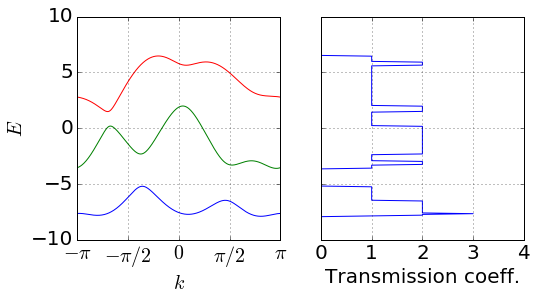

In [53]:
figsize(8,4)
subplot(121)
plot(kran,spectr)
xlabel(r'$k$',fontsize=20)
xlim(-pi,pi)
xticks(linspace(-pi,pi,5),[r'$-\pi$',r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$'],fontsize=20);
ylabel(r'$E$',fontsize=20)
grid()
yticks(linspace(-10,10,5),fontsize=20);

subplot(122)
plot(real(TR),erange)
yticks(linspace(-10,10,5),['','','','',''],fontsize=20);
xticks(linspace(0,4,5),fontsize=20)
xlabel('Transmission coeff.',fontsize=20)
grid()

In [54]:
# Tunel junction 
TRs=[]
for E in erange:
    TRs.append(SMAT_tunnel(L,E,.5))


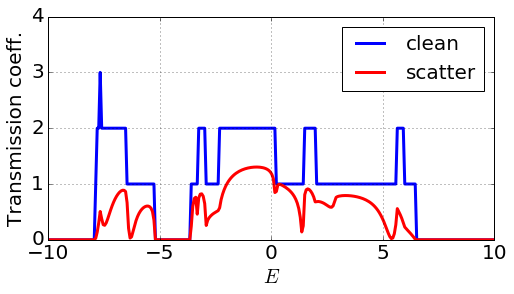

In [64]:
plot(erange,real(TR),label='clean',lw=3,color='blue')
plot(erange,real(TRs),label='scatter',lw=3,color='red')
legend(fontsize=20)
xticks(linspace(-10,10,5),fontsize=20);
xlabel(r'$E$',fontsize=20)
ylabel('Transmission coeff.',fontsize=20)
yticks(linspace(0,4,5),fontsize=20)
grid()